# <div style="width: 800px; margin: 40px 0px 0 30px; background-color:#880d1e; padding: 0px; text-align:center; font: bold 5rem 'Fira Sans', sans-serif; border-radius: 25px 15px; color:#f49cbb;"> Sentiment Analysis of British Airways </div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re

In [2]:
df = pd.read_csv("BA_Scraping.csv")
df

,Unnamed: 0,header,review
0,0,"""Zero customer service""",✅ Trip Verified | The plane was extremely dir...
1,1,"""baggage arrival nearly took 1.5 hours""",Not Verified | Overall journey wasn’t bad howe...
2,2,"""Overall very satisfied""",✅ Trip Verified | Overall very satisfied. Gro...
3,3,"""airline is a total disgrace""",✅ Trip Verified | As always when I fly BA it ...
4,4,"""we were pleased with the service""",✅ Trip Verified | First time using BA busines...
...,...,...,...
2995,2995,British Airways customer review,LGW-CUN-LGW. Husband and I had middle seats bo...
2996,2996,British Airways customer review,Gatwick-Naples returning Barcelona-Gatwick. Ex...
2997,2997,British Airways customer review,Business Class Tampa - Gatwick. Fantastic serv...
2998,2998,British Airways customer review,Used Avios to upgrade return flights to Grenad...


In [3]:
# Let's drop the Unnamed: 0 First
df = df.drop('Unnamed: 0', axis=1)
df

,header,review
0,"""Zero customer service""",✅ Trip Verified | The plane was extremely dir...
1,"""baggage arrival nearly took 1.5 hours""",Not Verified | Overall journey wasn’t bad howe...
2,"""Overall very satisfied""",✅ Trip Verified | Overall very satisfied. Gro...
3,"""airline is a total disgrace""",✅ Trip Verified | As always when I fly BA it ...
4,"""we were pleased with the service""",✅ Trip Verified | First time using BA busines...
...,...,...
2995,British Airways customer review,LGW-CUN-LGW. Husband and I had middle seats bo...
2996,British Airways customer review,Gatwick-Naples returning Barcelona-Gatwick. Ex...
2997,British Airways customer review,Business Class Tampa - Gatwick. Fantastic serv...
2998,British Airways customer review,Used Avios to upgrade return flights to Grenad...


In [4]:
df.review[1299]

'✅ Trip Verified |  Worst business class I flew, you are facing a stranger for the entire flight. Also every time the crew have to service a passenger next to me, i have to stop eating and crew has to serve in front of my face. Dreadful food, a very dated 777 plane and  uninterested staff. The bar on board was supposed to have full range of mid flight snack and sandwiches but apparently they ran out and the reason from cabin crew said people are taking too much food. They also ran out of the appetiser. I was told sorry, we ran out of satay, and other passengers have already ordered them. Therefore, please select another option. '

In [5]:
df.review[1299].split("| ")[1]

' Worst business class I flew, you are facing a stranger for the entire flight. Also every time the crew have to service a passenger next to me, i have to stop eating and crew has to serve in front of my face. Dreadful food, a very dated 777 plane and  uninterested staff. The bar on board was supposed to have full range of mid flight snack and sandwiches but apparently they ran out and the reason from cabin crew said people are taking too much food. They also ran out of the appetiser. I was told sorry, we ran out of satay, and other passengers have already ordered them. Therefore, please select another option. '

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   header  3000 non-null   object
 1   review  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [7]:
df.review[1299].rstrip("Verified | ")

'✅ Trip Verified |  Worst business class I flew, you are facing a stranger for the entire flight. Also every time the crew have to service a passenger next to me, i have to stop eating and crew has to serve in front of my face. Dreadful food, a very dated 777 plane and  uninterested staff. The bar on board was supposed to have full range of mid flight snack and sandwiches but apparently they ran out and the reason from cabin crew said people are taking too much food. They also ran out of the appetiser. I was told sorry, we ran out of satay, and other passengers have already ordered them. Therefore, please select another option.'

In [8]:
# first remove the trip verified and not verified
def remove_trip(text):
    cln_msg = re.sub(r"✅ Trip Verified | +|Not Verified | + | +|^\s+|\s+|\s+$",' ', text)
    msg = re.sub("[^a-zA-Z]", " ",str(cln_msg))
    return msg.lower()

In [9]:
df['clean_review'] = df['review'].apply(remove_trip)
df

,header,review,clean_review
0,"""Zero customer service""",✅ Trip Verified | The plane was extremely dir...,the plane was extremely dirty with chocolat...
1,"""baggage arrival nearly took 1.5 hours""",Not Verified | Overall journey wasn’t bad howe...,overall journey wasn t bad however at the e...
2,"""Overall very satisfied""",✅ Trip Verified | Overall very satisfied. Gro...,overall very satisfied ground staff member...
3,"""airline is a total disgrace""",✅ Trip Verified | As always when I fly BA it ...,as always when i fly ba it was a total sham...
4,"""we were pleased with the service""",✅ Trip Verified | First time using BA busines...,first time using ba business class but we w...
...,...,...,...
2995,British Airways customer review,LGW-CUN-LGW. Husband and I had middle seats bo...,lgw cun lgw husband and i had middle seats bo...
2996,British Airways customer review,Gatwick-Naples returning Barcelona-Gatwick. Ex...,gatwick naples returning barcelona gatwick ex...
2997,British Airways customer review,Business Class Tampa - Gatwick. Fantastic serv...,business class tampa gatwick fantastic serv...
2998,British Airways customer review,Used Avios to upgrade return flights to Grenad...,used avios to upgrade return flights to grenad...


In [10]:
df['clean_review'][200]

'   had the worst experience  the flight from london to toronto got delayed and we missed the connecting flight to halifax  we were four including an infant and a toddler aged   years  despite being delayed and missed the connecting flight the ground staff were not at all helpful  we waited for an hour to get them to talk to us and at    am they told us they have not booked any hotel for us to stay that night and asked to go search for a hotel on your own  very nice of you british airways  at least you guys should have given some consideration to the travelers who travel with children and booked some accommodation  we will not to travel on this airline again '

## NLTK

In [11]:
# NLTK Libaries
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import SnowballStemmer
from string import punctuation
import string

from nltk.stem import WordNetLemmatizer
import wordcloud
from wordcloud import WordCloud,STOPWORDS

from PIL import Image

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [12]:
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)
lemma = WordNetLemmatizer()

In [13]:
stop_words

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [14]:
test = []
word_test = df['clean_review'][2]
def cleaning_word(text):
    new_list_word = []
    word_token = word_tokenize(text)
    for word in word_token:
        if word not in stop_words and word.isalpha():
            word = lemma.lemmatize(word)
            new_list_word.append(word)
    return new_list_word

In [15]:
df['clean_review'][2]

'   overall very satisfied  ground staff member at yvr was extremely helpful   courteous  a    was only a few months old  so seats were in good order   comfortable by the standards of a modern day y class seat  although the very small washroom was already starting to look a bit shabby  cabin crew very friendly   professional    meal service carried out at reasonable time in the flight  choice of   options for the main meal which was the same for both legs of my journey   month apart  flight departed on time but unfortunately upon landing at lhr we were unable to deplane for quite some time due to a staffing issue at lhr which so not the fault of the airline  and we were given frequent updates on the situation from the flight manager   the flight deck '

In [16]:
cleaning_word(word_test)

['overall',
 'satisfied',
 'ground',
 'staff',
 'member',
 'yvr',
 'extremely',
 'helpful',
 'courteous',
 'month',
 'old',
 'seat',
 'good',
 'order',
 'comfortable',
 'standard',
 'modern',
 'day',
 'class',
 'seat',
 'although',
 'small',
 'washroom',
 'already',
 'starting',
 'look',
 'bit',
 'shabby',
 'cabin',
 'crew',
 'friendly',
 'professional',
 'meal',
 'service',
 'carried',
 'reasonable',
 'time',
 'flight',
 'choice',
 'option',
 'main',
 'meal',
 'leg',
 'journey',
 'month',
 'apart',
 'flight',
 'departed',
 'time',
 'unfortunately',
 'upon',
 'landing',
 'lhr',
 'unable',
 'deplane',
 'quite',
 'time',
 'due',
 'staffing',
 'issue',
 'lhr',
 'fault',
 'airline',
 'given',
 'frequent',
 'update',
 'situation',
 'flight',
 'manager',
 'flight',
 'deck']

In [17]:
df['word_token'] = df['clean_review'].apply(cleaning_word)
# flat_stemmed_nested_list = [item for sublist in df['word_token'] for item in sublist]
# flat_stemmed_nested_list

In [18]:
df

,header,review,clean_review,word_token
0,"""Zero customer service""",✅ Trip Verified | The plane was extremely dir...,the plane was extremely dirty with chocolat...,"[plane, extremely, dirty, chocolate, smudged, ..."
1,"""baggage arrival nearly took 1.5 hours""",Not Verified | Overall journey wasn’t bad howe...,overall journey wasn t bad however at the e...,"[overall, journey, bad, however, end, baggage,..."
2,"""Overall very satisfied""",✅ Trip Verified | Overall very satisfied. Gro...,overall very satisfied ground staff member...,"[overall, satisfied, ground, staff, member, yv..."
3,"""airline is a total disgrace""",✅ Trip Verified | As always when I fly BA it ...,as always when i fly ba it was a total sham...,"[always, fly, ba, total, shamble, booked, manc..."
4,"""we were pleased with the service""",✅ Trip Verified | First time using BA busines...,first time using ba business class but we w...,"[first, time, using, ba, business, class, plea..."
...,...,...,...,...
2995,British Airways customer review,LGW-CUN-LGW. Husband and I had middle seats bo...,lgw cun lgw husband and i had middle seats bo...,"[lgw, cun, lgw, husband, middle, seat, outboun..."
2996,British Airways customer review,Gatwick-Naples returning Barcelona-Gatwick. Ex...,gatwick naples returning barcelona gatwick ex...,"[gatwick, naples, returning, barcelona, gatwic..."
2997,British Airways customer review,Business Class Tampa - Gatwick. Fantastic serv...,business class tampa gatwick fantastic serv...,"[business, class, tampa, gatwick, fantastic, s..."
2998,British Airways customer review,Used Avios to upgrade return flights to Grenad...,used avios to upgrade return flights to grenad...,"[used, avios, upgrade, return, flight, grenada..."


In [19]:
df['final'] = df['word_token'].apply(lambda x: " ".join(x))
df['final'] = df['final'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   header        3000 non-null   object
 1   review        3000 non-null   object
 2   clean_review  3000 non-null   object
 3   word_token    3000 non-null   object
 4   final         3000 non-null   object
dtypes: object(5)
memory usage: 117.3+ KB


In [20]:
df.final[0]

'plane extremely dirty chocolate smudged mine child seat wipe seat landed immediately realized left camera bag airplane overhead cabin would let back plane security reason went british airway team ground refused contact cabin crew threw massive fuss manager reluctantly agreed point cabin crew disembarked week sign camera assumed stolen complained british airway get automated generic response keep checking lost property zero customer service regular customer could mitigated willing help beginning disappointed'

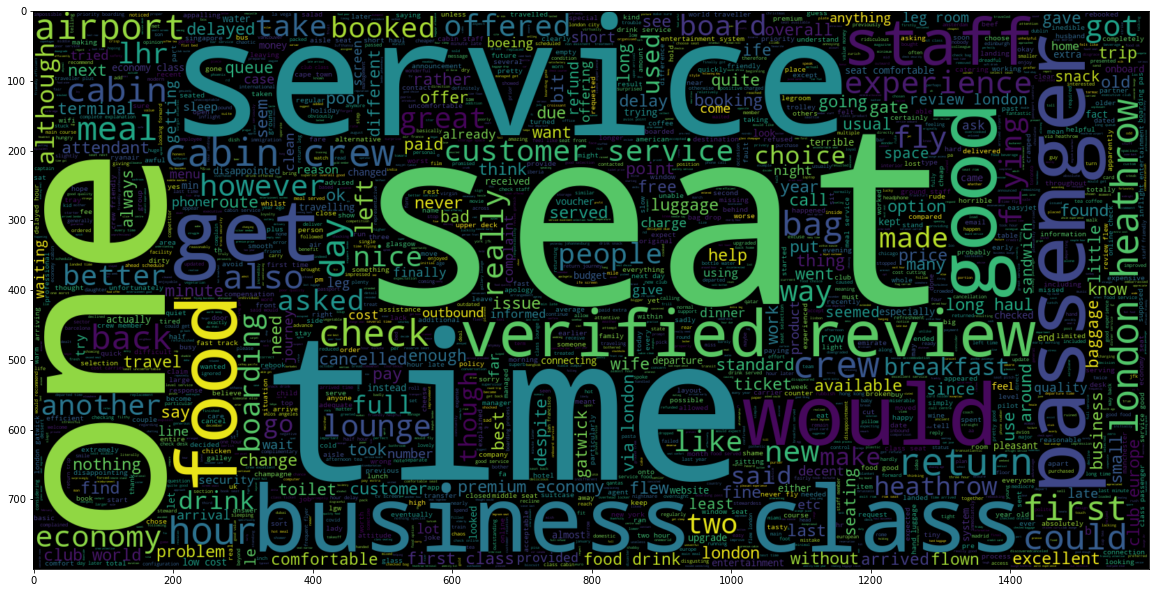

In [21]:
# Created Word Cloud
stop_words.update(['the', 'and', 'to', 'of', 'in', 'for', 'on', 'with', 'it', 'was', 'as', 'at', 
                  'this', 'that','ba','flight','airline','airlines','british','airway','flights',
                   'will','called','british airway','much','still','plane','even','told','airways','aircraft','u',
                   'given','now','well'])
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words)
wc.generate(' '.join(df.final))
plt.imshow(wc , interpolation = 'bilinear')

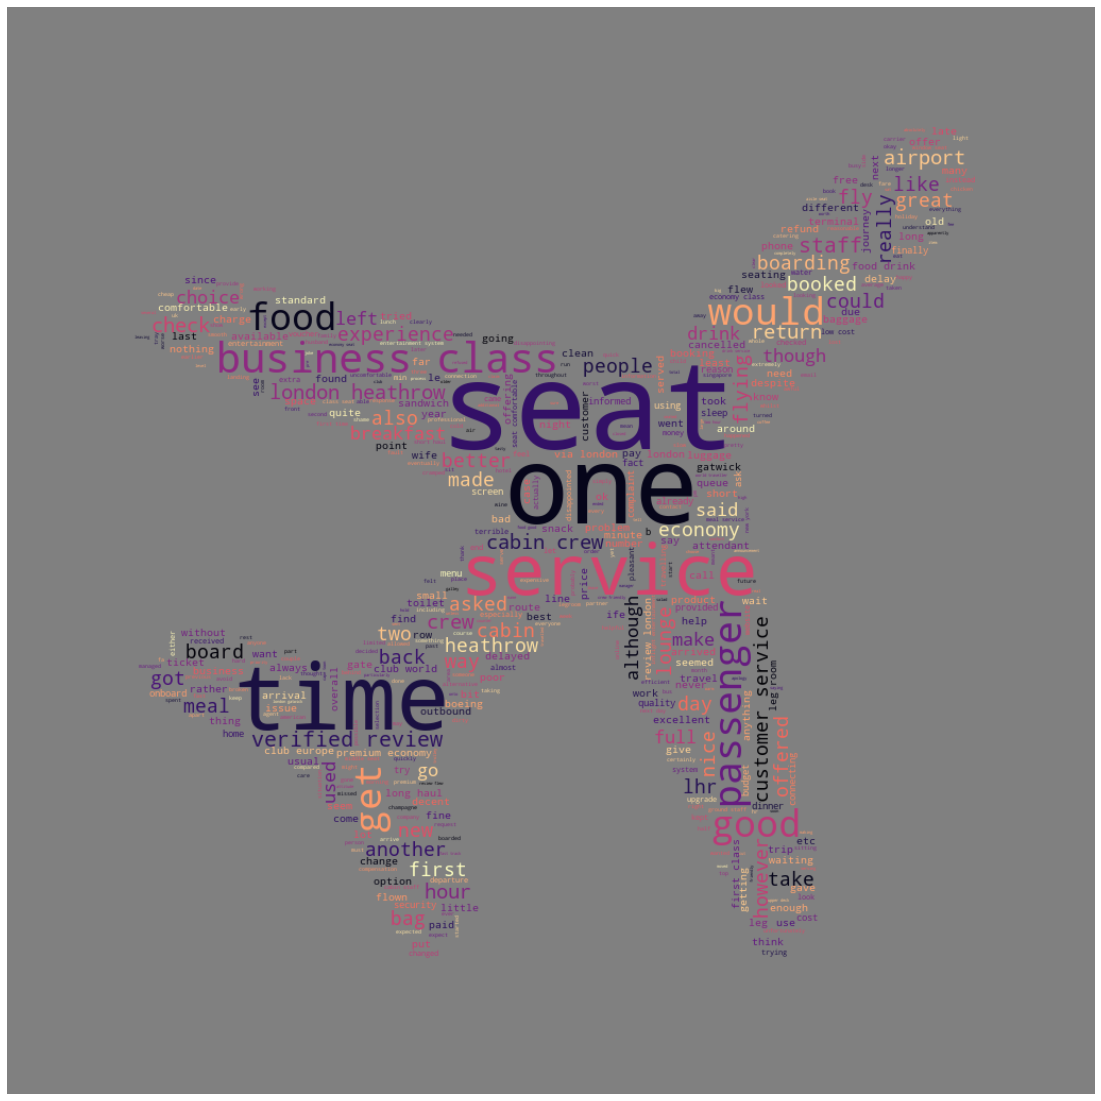

In [22]:
icon = Image.open('Airplane.png')
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask)


word_cloud = WordCloud(mask=rgb_array, background_color='grey', max_words=500,
                      colormap='magma', stopwords = stop_words)
word_cloud.generate(' '.join(df.final))
plt.figure(figsize = (20,20)) # Text that is not Fake
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
df_sentiment = df.loc[:, ['final']]
df_sentiment

,final
0,plane extremely dirty chocolate smudged mine c...
1,overall journey bad however end baggage arriva...
2,overall satisfied ground staff member yvr extr...
3,always fly ba total shamble booked manchester ...
4,first time using ba business class pleased ser...
...,...
2995,lgw cun lgw husband middle seat outbound retur...
2996,gatwick naples returning barcelona gatwick exc...
2997,business class tampa gatwick fantastic service...
2998,used avios upgrade return flight grenada previ...



# Sentiment Analysis

In [24]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [25]:
def vander_sentiment_analyzer(text):
    vsa = analyzer.polarity_scores(text)
    return vsa ['compound']

df_sentiment['sentiment'] = df_sentiment['final'].apply(vander_sentiment_analyzer)

In [26]:
df_sentiment.final[1]

'overall journey bad however end baggage arrival nearly took hour actual flight time baggage flight arriving delivered whereas baggage staff airport clue information baggage flight arrived raised hand saying anything poor communication customer facing skill'

In [27]:
test = analyzer.polarity_scores(df_sentiment.final[1])
test['compound']

-0.5267

In [28]:
df_sentiment

,final,sentiment
0,plane extremely dirty chocolate smudged mine c...,-0.8718
1,overall journey bad however end baggage arriva...,-0.5267
2,overall satisfied ground staff member yvr extr...,0.9296
3,always fly ba total shamble booked manchester ...,-0.8126
4,first time using ba business class pleased ser...,0.9349
...,...,...
2995,lgw cun lgw husband middle seat outbound retur...,0.9506
2996,gatwick naples returning barcelona gatwick exc...,0.8822
2997,business class tampa gatwick fantastic service...,0.5994
2998,used avios upgrade return flight grenada previ...,0.9674


In [29]:
def analyzer_sentiment(value):
    if value >= 0.5:
        return 'Positive'
    elif value < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
df_sentiment['analyzer'] = df_sentiment['sentiment'].apply(analyzer_sentiment)
df_sentiment

,final,sentiment,analyzer
0,plane extremely dirty chocolate smudged mine c...,-0.8718,Negative
1,overall journey bad however end baggage arriva...,-0.5267,Negative
2,overall satisfied ground staff member yvr extr...,0.9296,Positive
3,always fly ba total shamble booked manchester ...,-0.8126,Negative
4,first time using ba business class pleased ser...,0.9349,Positive
...,...,...,...
2995,lgw cun lgw husband middle seat outbound retur...,0.9506,Positive
2996,gatwick naples returning barcelona gatwick exc...,0.8822,Positive
2997,business class tampa gatwick fantastic service...,0.5994,Positive
2998,used avios upgrade return flight grenada previ...,0.9674,Positive


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


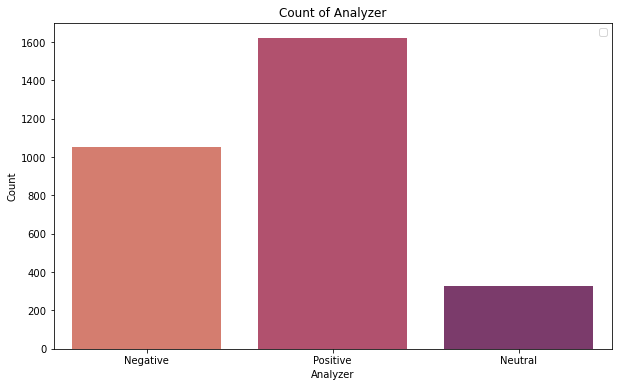

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df_sentiment, x='analyzer', palette='flare')
plt.title("Count of Analyzer")
plt.xlabel('Analyzer')
plt.ylabel('Count')
plt.legend()
plt.show();

In [32]:
from textblob import TextBlob

In [33]:
text_blob = TextBlob(df_sentiment.final[1]).sentiment
text_blob

Sentiment(polarity=-0.19999999999999998, subjectivity=0.35333333333333333)

In [34]:
df_sentiment_tb = df.loc[:, ['final']]
df_sentiment_tb

,final
0,plane extremely dirty chocolate smudged mine c...
1,overall journey bad however end baggage arriva...
2,overall satisfied ground staff member yvr extr...
3,always fly ba total shamble booked manchester ...
4,first time using ba business class pleased ser...
...,...
2995,lgw cun lgw husband middle seat outbound retur...
2996,gatwick naples returning barcelona gatwick exc...
2997,business class tampa gatwick fantastic service...
2998,used avios upgrade return flight grenada previ...


In [35]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [36]:
df_sentiment_tb['tb_polarity'] = df_sentiment_tb.final.apply(get_polarity)
df_sentiment_tb['tb_subjectivity'] = df_sentiment_tb.final.apply(get_subjectivity)
df_sentiment_tb

,final,tb_polarity,tb_subjectivity
0,plane extremely dirty chocolate smudged mine c...,-0.127273,0.325175
1,overall journey bad however end baggage arriva...,-0.200000,0.353333
2,overall satisfied ground staff member yvr extr...,0.102193,0.479386
3,always fly ba total shamble booked manchester ...,0.065556,0.638889
4,first time using ba business class pleased ser...,0.249320,0.577721
...,...,...,...
2995,lgw cun lgw husband middle seat outbound retur...,0.107917,0.446250
2996,gatwick naples returning barcelona gatwick exc...,0.224242,0.630303
2997,business class tampa gatwick fantastic service...,0.016667,0.850000
2998,used avios upgrade return flight grenada previ...,0.506250,0.620833


In [38]:
def get_analysis(score_polarity):
    if score_polarity > 0:
        return 'Positive'
    elif score_polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    

df_sentiment_tb['analyzer'] = df_sentiment_tb['tb_polarity'].apply(get_analysis)
df_sentiment_tb

,final,tb_polarity,tb_subjectivity,analyzer
0,plane extremely dirty chocolate smudged mine c...,-0.127273,0.325175,Negative
1,overall journey bad however end baggage arriva...,-0.200000,0.353333,Negative
2,overall satisfied ground staff member yvr extr...,0.102193,0.479386,Positive
3,always fly ba total shamble booked manchester ...,0.065556,0.638889,Positive
4,first time using ba business class pleased ser...,0.249320,0.577721,Positive
...,...,...,...,...
2995,lgw cun lgw husband middle seat outbound retur...,0.107917,0.446250,Positive
2996,gatwick naples returning barcelona gatwick exc...,0.224242,0.630303,Positive
2997,business class tampa gatwick fantastic service...,0.016667,0.850000,Positive
2998,used avios upgrade return flight grenada previ...,0.506250,0.620833,Positive


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


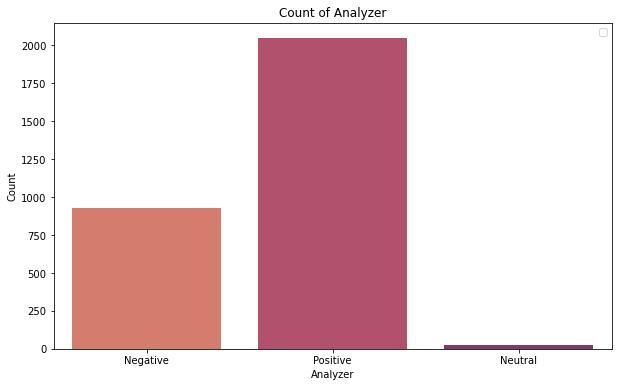

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(df_sentiment_tb, x='analyzer', palette='flare')
plt.title("Count of Analyzer")
plt.xlabel('Analyzer')
plt.ylabel('Count')
plt.legend()
plt.show();

In [40]:
df_sentiment_tb[df_sentiment_tb['analyzer']=='Neutral']

,final,tb_polarity,tb_subjectivity,analyzer
50,cabin luggage go cargo even said carried medic...,0.0,0.300000,Neutral
107,june flight cancelled within three hour depart...,0.0,0.000000,Neutral
145,came glasgow london took connecting flight ame...,0.0,0.000000,Neutral
318,beyond disgusted fact baggage yet delivered we...,0.0,0.356250,Neutral
356,told require hr negative covid test entry phil...,0.0,0.250000,Neutral
387,flight delayed hour course caused u missed con...,0.0,0.533333,Neutral
390,belfast london jun informed flight ba delayed ...,0.0,0.208333,Neutral
565,cancelled flight booked three month ago operat...,0.0,0.000000,Neutral
604,london frankfurt made mistake exchanging april...,0.0,0.401923,Neutral
645,flying london seattle business class may briti...,0.0,0.000000,Neutral


In [42]:
df.review[50]

'Not Verified | Cabin luggage had to go to cargo, even when I said I carried medicines. There was no time to get them out the hand luggage. The economy seats with Virgin Atlantic, KLM and even Ryanair have more space. Luckily it was a short flight.'

<a href="https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524"> Text Blob</a>